# Programming with Numpy

Numpy is a library for working with multidimensional data structures (especially numerical). A good overview of many Numpy functions can be found [here](https://numpy.org/devdocs/user/basics.html)

Numpy is widely used in the data sciences and can greatly accelerate computation time. One example we will look at in the notebook is using Numpy instead of iterating over the data. But we also need a bit of linear algebra (which often goes hand in hand with Numpy).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time

## Creating arrays

The basic data structure in Numpy are `arrays`. There are different ways to create a Numpy array. 

Here are a few examples:

### Array from list

The following three arrays all contain the same number of values (integers 1 - 8). The first array is created from a simple list, the second array from a 2-dimensional list and the third from a 3-dimensional list. The dimensions can be displayed in the same way as in `Pandas`.

In [2]:
ar_1d = np.array([1, 2, 3, 4, 5, 6, 7, 8])
ar_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
ar_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [3]:
print(ar_1d.shape)
print(ar_2d.shape)
print(ar_3d.shape)

(8,)
(2, 4)
(2, 2, 2)


When creating an array, the data type can also be specified. Displaying the data type is not exactly the same as in basic Python: `type()` vs. `.dtype`.

In [ ]:
ar_1d_int = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype= np.int32) # 32-bit Integers i.e. 2^32 unterschiedliche Integer möglich
ar_1d_fl = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype= float)

print(ar_1d_int.dtype)
print(ar_1d_fl.dtype)

int32
float64


In [6]:
ar_1d_fl

array([1., 2., 3., 4., 5., 6., 7., 8.])

### Arrays from Numpy Functions

`arange()` is similar to `range()` in basic Python:

In [8]:
a = np.arange(10) # 0 bis 9
b = np.arange(2,8) # beginnt bei 2
c = np.arange(2,8,2) # geht in 2er Schritten

print(a)
print(b)
print(c)

[0 1 2 3 4 5 6 7 8 9]
[2 3 4 5 6 7]
[2 4 6]


With `linspace()` a certain number of elements can be created between two values (evenly spaced):

In [9]:
d = np.linspace(2,8,6)

print(d.shape)
print(d)

(6,)
[2.  3.2 4.4 5.6 6.8 8. ]


Filled multidimensional arrays can be created with `ones()` and `zeros()`:

In [10]:
zero = np.zeros((2, 3))
one = np.ones((3, 4, 2))

print(zero)
print(one)

[[0. 0. 0.]
 [0. 0. 0.]]
[[[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]


#### Random

Multidimensional arrays (with random numbers) can also be filled with Numpys `random`-function. There are many possibilities (i.e. different random distributions):

Random numbers between 0 and 1:

In [12]:
np.random.rand(3,2) # (3,2) dimensional matrix

array([[0.52773685, 0.78974411],
       [0.03531975, 0.45559507],
       [0.53039742, 0.06966036]])

Random numbers of the *standard normal distribution* (mean = 0, sd = 1):

In [13]:
np.random.randn(4,3)

array([[-1.4330295 , -1.05056175,  0.58439726],
       [-1.31834317,  1.13076116, -0.09932636],
       [ 0.02804345,  0.09556326, -0.93851394],
       [-0.50457846,  0.30833847, -0.71357171]])

When creating many samples for a 1-d normal distribution we should see the Gaussian bellshaped curve.

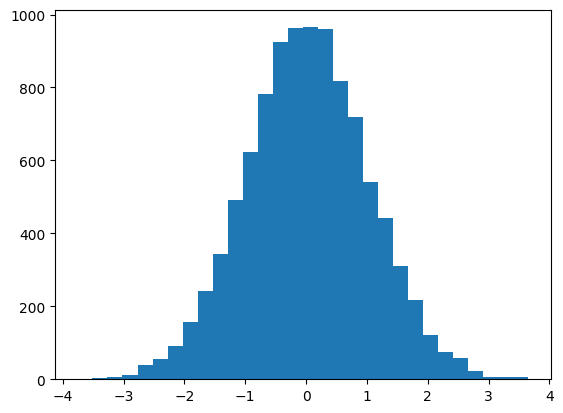

In [25]:
import matplotlib.pyplot as plt
rand = np.random.randn(10000)
plt.hist(rand, bins=30)
plt.show()

Random integers between 20 and 100 as a (3,2)-dimensional array

In [22]:
np.random.randint(20, 100, size=(3,2))


array([[58, 93],
       [27, 99],
       [77, 96]])

Randomly choose from a list of available values to create a (2,3)-dimensional array:

In [23]:
np.random.choice([3, 5, 7, 9], size=(2, 3))

array([[7, 5, 5],
       [9, 3, 5]])

And many more...see [here](https://numpy.org/doc/1.16/reference/routines.random.html) for inspiration.

## Index in arrays

Indexing can be a bit confusing with multiple dimensions. 

- Basically, we can use integer numbers per dimension to specify which data we want (e.g. 0 for the first dimension means that we only ever want the first value of this dimension)
- If we enter *:* for a dimension, this means that we want all values
- With *2:* we want all values from the 3rd onwards for the dimension in question. With *:2* we want the first three numbers of the dimension.

Here we go... We create a 3-dimensional array of integer values between 0 and 50:

In [27]:
rand_int = np.random.randint(50, size=(3,2,4))
rand_int

array([[[39, 34, 48, 44],
        [45, 47,  3, 47]],

       [[41, 39, 46, 41],
        [ 8, 23, 14, 12]],

       [[49, 48, 26, 35],
        [42, 23, 44, 44]]])

We would like to have only the first value of each dimension and all values of the other dimensions:

In [28]:
rand_int[0, :, :]

array([[39, 34, 48, 44],
       [45, 47,  3, 47]])

In [29]:
rand_int[:,0,:]

array([[39, 34, 48, 44],
       [41, 39, 46, 41],
       [49, 48, 26, 35]])

In [30]:
rand_int[:, :, 0]

array([[39, 45],
       [41,  8],
       [49, 42]])

We would like to have only the first two values of the first dimension and all other values:

In [31]:
rand_int[:2, :, :]

array([[[39, 34, 48, 44],
        [45, 47,  3, 47]],

       [[41, 39, 46, 41],
        [ 8, 23, 14, 12]]])

We only want the last two values of the third dimension and all other values:

In [32]:
rand_int[:, :, -2:]

array([[[48, 44],
        [ 3, 47]],

       [[46, 41],
        [14, 12]],

       [[26, 35],
        [44, 44]]])

## Change dimensions

We will not go into the depths of the topic here. There are a number of functions to change the dimensionality of arrays very quickly. A few common examples are shown using a 2d array with 6 elements:

In [33]:
rand_int = np.random.randint(50, size=(3,2))
rand_int

array([[20, 10],
       [24, 25],
       [32, 30]])

`reshape()` gives us the opportunity to choose the new dimensions ourselves:

In [34]:
rand_int.reshape(2,3)

array([[20, 10, 24],
       [25, 32, 30]])

We can also `transpose` the array (i.e. mirror it, columns as rows and rows as columns, often used in statistical modeling):

In [35]:
rand_int.T

array([[20, 24, 32],
       [10, 25, 30]])

A common special case of `reshape` is `flatten`. This creates a 1d array, regardless of the origin (a common first step in neural networks):

In [36]:
rand_int.flatten()

array([20, 10, 24, 25, 32, 30])

Not surprising either; we can cut the dimensions to size with `resize()`. Perhaps more surprising is the example of expanding an existing array.

In [37]:
np.resize(rand_int, (2,2))

array([[20, 10],
       [24, 25]])

In [38]:
np.resize(rand_int, (4,2))

array([[20, 10],
       [24, 25],
       [32, 30],
       [20, 10]])

## Pandas to Numpy and back

We reload the bike measurements from Langstrasse Zurich as Pandas Dataframe.

In [39]:
velo = pd.read_csv("velozaehldaten_aufbereitet.csv", sep=",", encoding="utf-8")
velo['ds'] = pd.to_datetime(velo['ds'], format="%Y-%m-%d %H:%M:%S")

We filter the dataframe so that we have the first three weeks of January 2021 as separate dataframes (since the time field in the dataframe has datetime format, we must also pass the filter with `datetime()`).

In [40]:
velo_w1 = velo[(velo['ds'] >= datetime(2021, 1, 4)) & (velo['ds'] <= datetime(2021, 1, 11))]
velo_w2 = velo[(velo['ds'] >= datetime(2021, 1, 11)) & (velo['ds'] <= datetime(2021, 1, 18))]
velo_w3 = velo[(velo['ds'] >= datetime(2021, 1, 18)) & (velo['ds'] <= datetime(2021, 1, 25))]

The measured values of the three Pandas data frames can easily be converted into numpy arrays.

In [41]:
w1 = velo_w1['y'].to_numpy()
w2 = velo_w2['y'].to_numpy()
w3 = velo_w3['y'].to_numpy()

Numpy arrays can also be plotted well with `Matplotlib`.

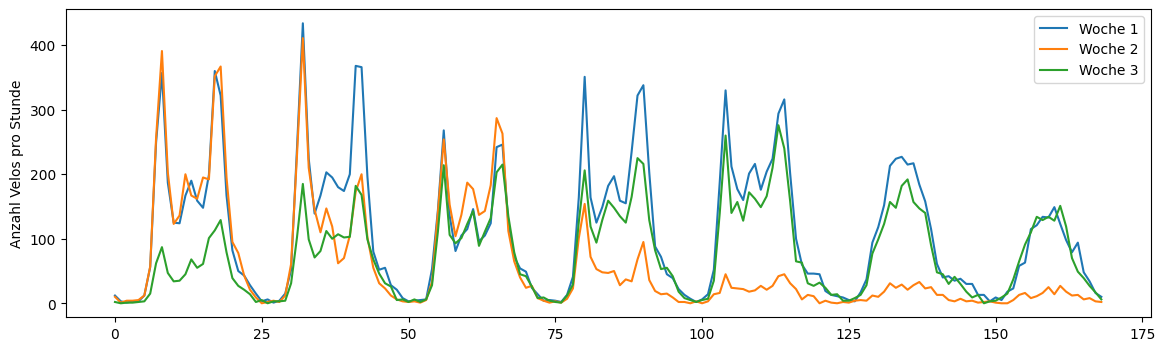

In [42]:
plt.figure(figsize=(14, 4))
plt.plot(w1, label='Woche 1')
plt.plot(w2, label='Woche 2')
plt.plot(w3, label='Woche 3')
plt.ylabel('Anzahl Velos pro Stunde')
plt.legend()
plt.show()

In the second week of January, around January 15, you could ski to work in Zurich (see [here](https://www.srf.ch/meteo/meteo-stories/monatsrueckblick-januar-2021-der-grosse-schneemonat-ein-drama)). That's probably why there were only a few bikes on the road...this pattern continues into the 3rd week of January.

We now create a new Pandas dataframe, consisting of a column of a dataframe (`Series`) and a numpy array:

In [43]:
velo_w2_np = pd.DataFrame({
    "ds": velo_w2["ds"], # Spalte von Dataframe
    "y": w2 # Numpy Array
})

To test that the Pandas dataframe contains the same values again, here is another plot.

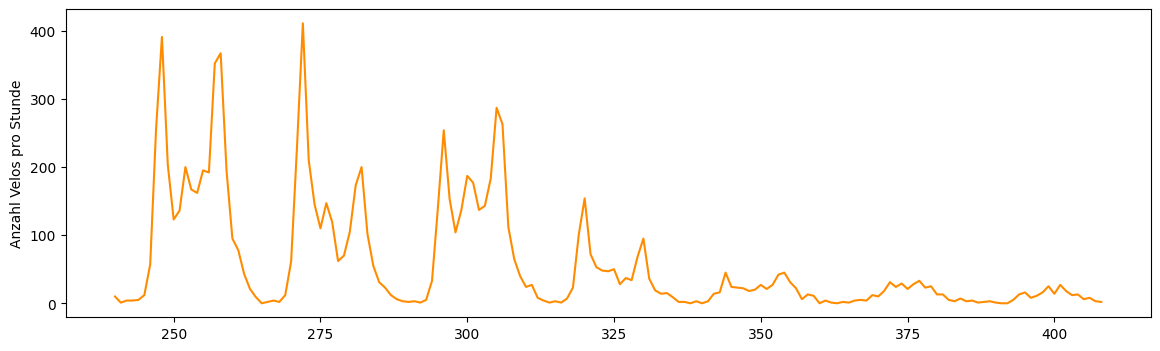

In [44]:
plt.figure(figsize=(14, 4))
plt.plot(velo_w2_np["y"], color = "darkorange")
plt.ylabel('Anzahl Velos pro Stunde')
plt.show()

## Calculating with Numpy

As mentioned at the beginning, fast calculation is one of the biggest advantages of Numpy.

In particular, operations such as matrix multiplications (scalar product) are processed in parallel thanks to Numpy.

### Multiplication of arrays and constants

During a multiplication (`dot()`), the constant is automatically multiplied by each value of the array. This is also called *broadcasting* (beware, it can be dangerous!).

In the following example, we create a 1d array with 1M random numbers. We compare how long the matrix multiplication takes and how long the multiplication takes in a loop.

In [45]:
arr = np.random.rand(1000000, 1)
konst = 10

In [46]:
start_time = time.time()

np.dot(arr, konst)

dot_time = time.time() - start_time
print(f"Dauer Matrixmultiplikation: {dot_time} sek")

Dauer Matrixmultiplikation: 0.0015180110931396484 sek


In [47]:
start_time = time.time()

for i in range(arr.shape[0]):
    arr[i] = arr[i]*konst
    
loop_time = time.time() - start_time
print(f"Dauer Loop: {loop_time} sek")

Dauer Loop: 0.6624569892883301 sek


Quite a difference!

### Multiplication of matrix and matrix

It is an advantage if you are aware of how matrix multiplication works when working with Numpy. The following graphic comes from the [Wikipedia article](https://en.wikipedia.org/wiki/Matrix_multiplication) on the topic: 

<img src="Matrix_multiplication.png" width=400 height=400 />

Accordingly, the multiplication (4,2)\*(2,3) results in a matrix of (4,3):

In [48]:
a = np.random.randint(10, size=(4,2))
b = np.random.randint(10, size=(2,3))

print(a)
print(b)

[[4 2]
 [2 6]
 [3 0]
 [7 5]]
[[1 6 5]
 [0 7 9]]


In [49]:
c = np.dot(a,b)

print(c.shape)
print(c)

(4, 3)
[[ 4 38 38]
 [ 2 54 64]
 [ 3 18 15]
 [ 7 77 80]]


#### Matrix multiplication for linear regression

You will certainly encounter matrix multiplication with Numpy again in the context of linear regression or neural networks. 

Suppose you have a linear regression with two explanatory variables (and without intercept): $y = w_1 x_1 + w_2 x_2$

Then it looks like this in Numpy:

In [50]:
# zwei Gewichte w1 und w2
w = np.array([3, 5])  # w1 = 3, w2 = 5

# Vier Datenpunkte für x1 und x2
x = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8]
])

# Voraussage Berechnen
y = np.dot(x, w)

print("Vier Predictions:", y)


Vier Predictions: [13 29 45 61]


### Cosine-Similarity

A popular measure for the similarity of vectors is cosine similarity. If the angle between two vectors is 0 degrees, i.e. both vectors point in the same direction, the cosine similarity is 1. 

With Numpy, the cosine similarity can be calculated very efficiently. First we define a function that calculates the cosine similarity.

In [51]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

We can then apply the function to any array.

In [52]:
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
similarity = cosine_similarity(array1, array2)
print(similarity)

0.9746318461970762


Also to the bicycle counts for the two weeks in January 2021:

In [53]:
sim_1_2 = cosine_similarity(w1, w2)
print(sim_1_2)

sim_1_3 = cosine_similarity(w1, w3)
print(sim_1_3)

0.7990496980810613
0.9440994256579593


As was to be expected, weeks 1 and 3 are more similar than weeks 1 and 2 (Schneesturm!).